<a href="https://colab.research.google.com/github/aayushiz/grip/blob/main/Solution1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = "http://bit.ly/w-data"
db = pd.read_csv(url)
db.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


**Preparing the data**

In [3]:
X = db.iloc[:, :-1].values  
y = db.iloc[:, 1].values 

split the data

In [4]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test= train_test_split(X, y,
                                 test_size = 0.2, random_state =0 )

**Train**

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
print('Coeff:', regressor.coef_)
print('Intercept:', regressor.intercept_)

Coeff: [9.91065648]
Intercept: 2.018160041434662


In [ ]:
import seaborn as sb

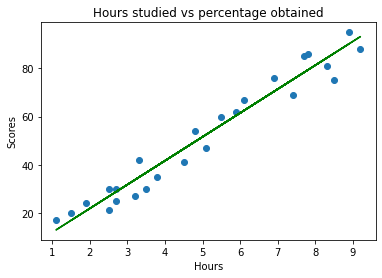

In [22]:
line = regressor.coef_*X + regressor.intercept_


plt.xlabel('Hours')  
plt.ylabel('Scores')  
  
# displaying the title 
plt.title("Hours studied vs percentage obtained") 
plt.scatter(X,y)
plt.plot(X, line, color="green");
plt.show()

Predictions

In [9]:
print(X_test)
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


Comparing actual vs predicted

In [10]:
df = pd.DataFrame({'Actual': y_test, 'Predicted' : y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**test your own data**

In [18]:
hours = 9
my_pred = regressor.predict(np.array([hours]).reshape(1,1))
print("Number of hours : {}".format(hours))
print("Predicted Score: {}".format(my_pred[0]))

Number of hours : 9
Predicted Score: 91.21406836721482


**Evaluating the model**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
print('Mean Squared Error (MSE) : %.2f'
      % mean_squared_error(y_test, y_pred))
print('R^2 : %.2f'
      % r2_score(y_test, y_pred))
print('Mean Absolute Error : %.2f'
      % mean_absolute_error(y_test, y_pred))